In [ ]:
https://rpruim.github.io/s341/S19/from-class/MathinRmd.html#:~:text=Math%20inside%20RMarkdown,10n%3D1n2.

#### Linear Regression
Is a simple and powerful model for predicting a numeric response from a set of one or more independent variables. This article will focus mostly on how the method is used in machine learning, so we won't cover common use cases like causal inference or experimental design. And although it may seem like linear regression is overlooked in modern machine learning's ever-increasing world of complex neural network architectures, the algorithm is still widely used across a large number of domains because it is effective, easy to interpret, and easy to extend. The key ideas in linear regression are recycled everywhere, so understanding the algorithm is a must-have for a strong foundation in machine learning.

In general, the equation for linear regression is


<i>	$\hat{y}$ = $\hat{B}_{0}$ + $\hat{B}_{1}$ $x_{n}$ + $\hat{B}_{2}$ $x_{2}$ + ... + $\hat{B}_{p}$ $x_{p}$ <i> 

#### Key Concepts of Linear Regression

### 1. Equation of a Line:
The equation for a simple linear regression (single feature) is:
**_y=mx+b_**

where:
* _y_ is the predicted value
* _m_ isthe slope (coefficent of _x_),
* _x_ is the independent variable,
* _b_ is the intercept ( the value of _y_ when _x_ = 0)


### 2. Cost Function (Mean Squared Error):
The cost function measures how well the model's predictions align with the actual data. The goal is to minimize this function:
        
$J_{θ}$ = 	$\frac{1}{2m}$ 	$\sum_{i = 1}^{m}$ ($J_{θ}$($x^{(i)}$) - $y^{(i)}$ )^2

where:
* _m_ is the number of training examples,
* _($J_{θ}$($x^{(i)}$)_ is the predicted value for example _𝑖_
* _($y^{(i)}$)_ is the actual value for example _𝑖_

### 3. Gradient Descent 
Gradient descent is an optimization algorithm used to minimize the cost function by iteratively adjusting the model parameters (𝜃). The update rule for each parameter is:

$𝜃_{j}$ := $𝜃_{j}$ - α $\frac{\partial f}{\partial 𝜃_{j}}$ _J_(𝜃)

where:

* 𝛼 is the learning rate,
* $\frac{\partial f}{\partial 𝜃_{j}}$ _J_(𝜃) s the partial derivative of the cost function with respect to $𝜃_{j}$ 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [2]:
# Get dataset
df_sal = pd.read_csv('data/Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Here, we can see Salary ranges from 37731 to 122391 and a median of 65237.

We can also find how the data is distributed visually using Seaborn distplot

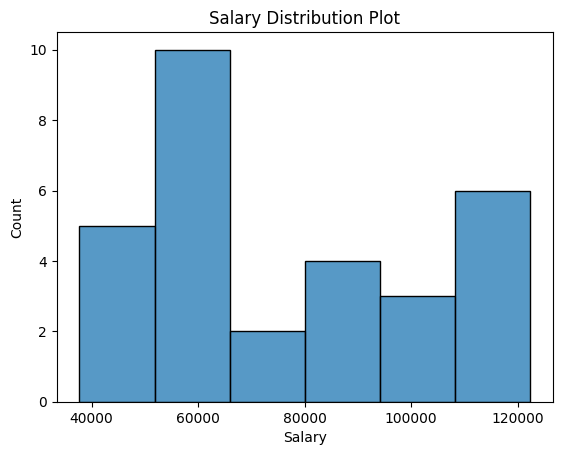

In [6]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.histplot(df_sal['Salary'])
plt.show()

A distplot or distribution plot shows the variation in the data distribution.
It represents the data by combining a line with a histogram.

Then we check the relationship between Salary and Experience -

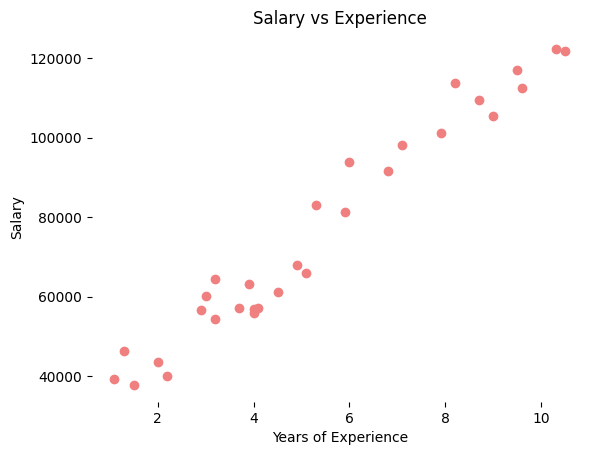

In [7]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

It is clearly visible now, our data varies linearly. That means, that an individual receives more Salary as they gain Experience.

### Step 4: Split the dataset into dependent/independent variables

Experience _(X)_ is the independent variable


Salary _(y)_ is dependent on experience

In [8]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent

#### Splitting variables
Further, split your data into training (80%) and test (20%) sets using train_test_split

In [9]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Step 5: Train the regression model
Pass the X_train and y_train data into the regressor model by regressor.fit to train the model with our training data.

In [10]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Step 6: Predict the result
Here comes the interesting part, when we are all set and ready to predict any value of **_y (Salary)_** dependent on **_X (Experience)_** with the trained model using **regressor.predict**

In [11]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

### Step 7: Plot the training and test results
Its time to test our predicted results by plotting graphs

* Plot training set data vs predictions
    First we plot the result of training sets _**(X_train, y_train)**_ with X_train and predicted value of y_train (regressor.predict(X_train))